In [14]:
from pearce.mocks.kittens import cat_dict
import numpy as np

In [15]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [16]:
cosmo_params = {'simname':'chinchilla', 'Lbox':400.0}

In [17]:
cat = cat_dict[cosmo_params['simname']](**cosmo_params)#construct the specified catalog!

In [18]:
cat.load(2.0/3.0, HOD='abRedMagic')

In [19]:
cat.model.param_dict

{'alpha': 1.02,
 'f_c': 0.19,
 'logM0': 12.2,
 'logM1': 13.7,
 'logMmin': 12.1,
 'mean_occupation_centrals_assembias_param1': 0.5,
 'mean_occupation_satellites_assembias_param1': 0.5,
 'sigma_logM': 0.46}

In [20]:
fiducial_point = {'logM0': 12.20, 'logM1': 13.7, 'alpha': 1.02,
                      'logMmin': 12.1, 'f_c': 0.19, 'sigma_logM': 0.46}

In [21]:
cat.model._input_model_dictionary['centrals_occupation']._get_assembias_param_dict_key(0)

'mean_occupation_centrals_assembias_param1'

In [22]:
fiducial_point['mean_occupation_centrals_assembias_param1'] = -1
fiducial_point['mean_occupation_satellites_assembias_param1'] = 0

In [23]:
#hod_point = [('f_c', 0.233), ('logM0', 12.0), ('sigma_logM', 0.533), 
#                   ('alpha', 1.083),('logM1', 13.5), ('logMmin', 12.233)]
hod_params = dict(fiducial_point)
cat.populate(hod_params)

In [24]:
cat.model.param_dict

{'alpha': 1.02,
 'f_c': 0.19,
 'logM0': 12.2,
 'logM1': 13.7,
 'logMmin': 12.1,
 'mean_occupation_centrals_assembias_param1': -1,
 'mean_occupation_satellites_assembias_param1': 0,
 'sigma_logM': 0.46}

In [25]:
cat.calc_number_density()

0.00092871875

In [26]:
pi_max = 40.
rp_bins = np.logspace(-1,1.25,15)
rp_points = (rp_bins[1:]+rp_bins[:-1])/2

In [27]:
wp_vals = []
for i in xrange(10):
    cat.populate(hod_params)
    wp_vals.append(cat.calc_wp(rp_bins, pi_max))
wp_vals = np.array(wp_vals)

In [28]:
wp_vals.shape

(10, 14)

In [29]:
wp = wp_vals.mean(axis=0)
cov = np.cov(wp_vals, rowvar=False)/np.sqrt(10)

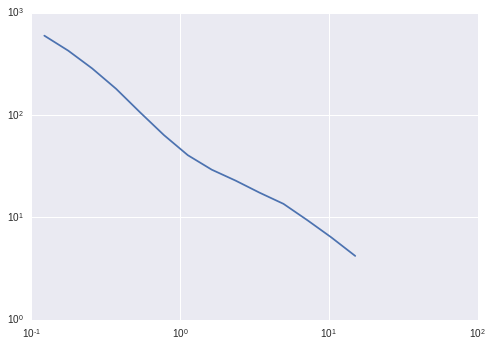

In [30]:
plt.plot(rp_points, wp)
plt.loglog()
plt.show()

In [31]:
theta_bins = np.logspace(-2,0,15)
theta_points = (theta_bins[:-1]+theta_bins[1:])/2.0
wt = cat.calc_wt(theta_bins)

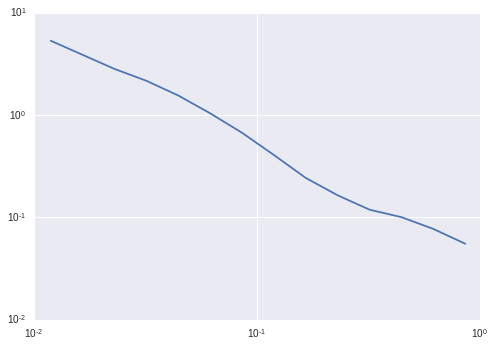

In [32]:
plt.plot(theta_points, wt)
plt.loglog()
plt.show()

In [33]:
rbins = np.array([  0.06309573,   0.12437607,   0.24517359,   0.34422476, 0.48329302, 0.67854546,\
           0.9526807 , 1.33756775,1.8779508 ,   2.6366509 ,   3.70186906,   5.19743987])#, 7.29722764, \
           #10.24533859,  14.38449888,  20.1958975])# , 28.35512583,  39.81071706] )
rpoints = (rbins[1:]+rbins[:-1])/2
jk_args= {'n_rands':3, 'n_sub':3}

In [34]:
#%%timeit
#try another estimator?
xi, cov = cat.calc_xi(rbins, jk_args=jk_args)

In [35]:
errs = np.sqrt(np.diag(cov))
print errs

[  1.56803938e+02   2.01100086e+01   5.73500595e+00   1.91854385e+00
   6.88550031e-01   3.31802493e-01   1.11088207e-01   3.45149293e-02
   1.68082561e-02   9.72718498e-03   5.27585457e-03]


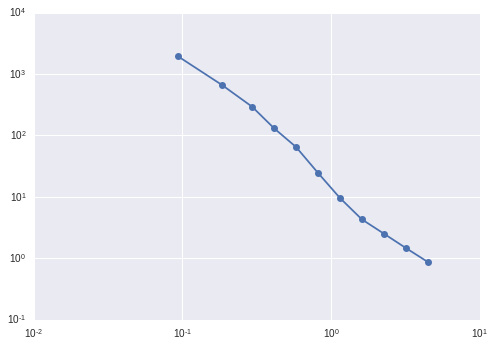

In [36]:
plt.errorbar(rpoints,xi,yerr=errs, fmt='o-')
plt.loglog()
plt.show()

In [37]:
#%%timeit
#try another estimator?
jk_args= {'n_rands':50, 'n_sub':3}
xi, cov = cat.calc_xi(rbins, jk_args=jk_args)

In [38]:
errs = np.sqrt(np.diag(cov))
print errs

[  2.00322946e+01   4.45034459e+00   1.51476294e+00   9.98619003e-01
   5.40597379e-01   3.16005982e-01   1.10835027e-01   3.35939842e-02
   1.59089281e-02   9.38278751e-03   5.09016069e-03]


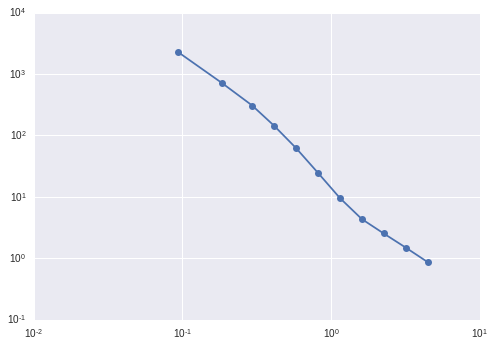

In [39]:
plt.errorbar(rpoints,xi,yerr=errs, fmt='o-')
plt.loglog()
plt.show()